##Importando Bibliotecas e Banco de dados

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Definir as ações
ticker3 = "GRND3.SA"
dolar = "USDBRL=X"

# Definir as datas inicial e final
data_inicial = "2017-01-01"
data_final = "2022-12-31"

# Baixar os dados históricos
dados_grnd = yf.download(ticker3, data_inicial, data_final)
cotacao_dolar = yf.download(dolar, data_inicial, data_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Visualizar os dados
dados_grnd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,5.860000,5.976666,5.820000,5.870000,3.818628,371400
2017-01-03,5.936666,6.016666,5.906666,6.016666,3.914039,699000
2017-01-04,6.023333,6.136666,6.000000,6.113333,3.976923,1278600
2017-01-05,6.053333,6.063333,5.950000,5.970000,3.883681,978300
2017-01-06,5.966666,5.983333,5.916666,5.933333,3.859828,678000
...,...,...,...,...,...,...
2022-12-23,6.530000,6.730000,6.530000,6.730000,5.743227,944600
2022-12-26,6.730000,6.770000,6.570000,6.590000,5.623755,752300
2022-12-27,6.600000,6.600000,6.250000,6.270000,5.350674,1238900


##Normalização do Banco de dados

In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalizar os dados
#for coluna in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
    dados_grnd[coluna] = (dados_grnd[coluna] - dados_grnd[coluna].min()) / (dados_grnd[coluna].max() - dados_grnd[coluna].min())
    cotacao_dolar[coluna] = (cotacao_dolar[coluna] - cotacao_dolar[coluna].min()) / (cotacao_dolar[coluna].max() - cotacao_dolar[coluna].min())

In [ ]:
dados_grnd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.211111,0.194396,0.222061,0.202523,0.097139,0.015492
2017-01-03,0.209677,0.227320,0.215893,0.241766,0.126865,0.076358
2017-01-04,0.244803,0.275306,0.260160,0.282761,0.157918,0.186955
2017-01-05,0.284946,0.280560,0.307692,0.295025,0.167207,0.156969
2017-01-06,0.298208,0.284413,0.305878,0.279257,0.155264,0.113118
...,...,...,...,...,...,...
2022-12-23,0.511828,0.534501,0.525762,0.537842,0.714593,0.102405
2022-12-26,0.554480,0.553065,0.565312,0.555361,0.733885,0.081767
2022-12-27,0.577419,0.552364,0.571480,0.545901,0.723467,0.074677


In [ ]:
# Criar a nova coluna Movimento 1 dia
dados_grnd["Movimento"] = (dados_grnd["Close"] > dados_grnd["Close"].shift(1)).astype("int")
dados_csna["Movimento"] = (dados_csna["Close"] > dados_csna["Close"].shift(1)).astype("int")
dados_grnd["Movimento"] = (dados_grnd["Close"] > dados_grnd["Close"].shift(1)).astype("int")

In [ ]:
# Criar a nova coluna Movimento 7 dias
dados_grnd["Movimento_7"] = dados_grnd["Close"].rolling(window=7).mean() > dados_grnd["Close"].shift(7)
dados_csna["Movimento_7"] = dados_csna["Close"].rolling(window=7).mean() > dados_csna["Close"].shift(7)
dados_grnd["Movimento_7"] = dados_grnd["Close"].rolling(window=7).mean() > dados_grnd["Close"].shift(7)

In [ ]:
# Converter os valores True e False para 0 e 1
dados_grnd["Movimento_7"] = (dados_grnd["Movimento_7"] == True).astype(int)
dados_csna["Movimento_7"] = (dados_csna["Movimento_7"] == True).astype(int)
dados_grnd["Movimento_7"] = (dados_grnd["Movimento_7"] == True).astype(int)

In [ ]:
dados_grnd.head(10)

In [ ]:
dados_grnd.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [ ]:
dados_grnd

,Close
Date,
2017-01-02,5.870000
2017-01-03,6.016666
2017-01-04,6.113333
2017-01-05,5.970000
2017-01-06,5.933333
...,...
2022-12-23,6.730000
2022-12-26,6.590000
2022-12-27,6.270000


In [ ]:
qtd_linhas = len(dados_grnd)
qtd_linhas

1493

In [ ]:
qtd_linhas_treino = round(0.7 * qtd_linhas)
qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste}"
)
info

'linhas treino= 0:1045 linhas teste= 1045:1493'

In [ ]:
# Criar um objeto StandardScaler e Normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dados_grnd)

In [ ]:
#Separa em treino e teste
train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino: qtd_linhas_treino+qtd_linhas_teste]

print (len(train), len(test))

1045 448


In [ ]:
def create_df (grnd, steps=1):
  dataX, dataY = [], []
  for i in range(len(grnd)-steps-1):
    a = grnd[i:(i+steps), 0]
    dataX.append(a)
    dataY.append(grnd[i + steps, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#gerando dados de treino e teste
steps = 15
X_train, Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1029, 15)
(1029,)
(432, 15)
(432,)


## Montando o modelo LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Montando o modelo
model = Sequential()
model.add(LSTM(35, return_sequences=True, input_shape=(steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 35)            5180      
                                                                 
 lstm_1 (LSTM)               (None, 15, 35)            9940      
                                                                 
 lstm_2 (LSTM)               (None, 35)                9940      
                                                                 
 dropout (Dropout)           (None, 35)                0         
                                                                 
 dense (Dense)               (None, 1)                 36        
                                                                 
Total params: 25096 (98.03 KB)
Trainable params: 25096 (98.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
validation = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, batch_size=15, verbose=2)

Epoch 1/300
69/69 - 6s - loss: 0.2472 - val_loss: 0.1665 - 6s/epoch - 81ms/step
Epoch 2/300
69/69 - 1s - loss: 0.1090 - val_loss: 0.1202 - 881ms/epoch - 13ms/step
Epoch 3/300
69/69 - 1s - loss: 0.0860 - val_loss: 0.0987 - 844ms/epoch - 12ms/step
Epoch 4/300
69/69 - 1s - loss: 0.0753 - val_loss: 0.0977 - 1s/epoch - 15ms/step
Epoch 5/300
69/69 - 1s - loss: 0.0682 - val_loss: 0.1034 - 1s/epoch - 18ms/step
Epoch 6/300
69/69 - 1s - loss: 0.0633 - val_loss: 0.0868 - 863ms/epoch - 13ms/step
Epoch 7/300
69/69 - 1s - loss: 0.0585 - val_loss: 0.0839 - 848ms/epoch - 12ms/step
Epoch 8/300
69/69 - 1s - loss: 0.0579 - val_loss: 0.0866 - 888ms/epoch - 13ms/step
Epoch 9/300
69/69 - 1s - loss: 0.0546 - val_loss: 0.0777 - 1s/epoch - 17ms/step
Epoch 10/300
69/69 - 1s - loss: 0.0545 - val_loss: 0.0696 - 1s/epoch - 17ms/step
Epoch 11/300
69/69 - 1s - loss: 0.0513 - val_loss: 0.0671 - 1s/epoch - 16ms/step
Epoch 12/300
69/69 - 1s - loss: 0.0561 - val_loss: 0.0697 - 865ms/epoch - 13ms/step
Epoch 13/300
69/69 

In [ ]:
def accuracy(y_true, y_pred, threshold=0.1):
  """Calcula a acurácia de um modelo para uma variável contínua.

  Args:
    y_true: Os valores reais da variável contínua.
    y_pred: As previsões do modelo para a variável contínua.
    threshold: O limite para definir uma previsão como correta.

  Returns:
    A acurácia do modelo.
  """

  errors = np.abs(y_pred - y_true)
  correct_predictions = np.count_nonzero(errors <= threshold)
  total_predictions = len(y_pred)
  accuracy = correct_predictions / total_predictions
  return accuracy

def recall(y_true, y_pred, threshold=0.1):
  """Calcula o recall de um modelo para uma variável contínua.

  Args:
    y_true: Os valores reais da variável contínua.
    y_pred: As previsões do modelo para a variável contínua.
    threshold: O limite para definir uma previsão como positiva.

  Returns:
    O recall do modelo.
  """

  positive_examples = np.count_nonzero(y_true > threshold)
  true_positives = np.count_nonzero((y_true > threshold) & (y_pred > threshold))
  recall = true_positives / positive_examples
  return recall

# Calcular a acurácia e recall do modelo
accuracy = accuracy(Y_test, y_pred)
recall = recall(Y_test, y_pred)

# Imprimir os resultados
print("Acurácia:", accuracy)
print("Recall:", recall)

Acurácia: 23.20601851851852
Recall: 216.0


In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)

14/14 [==============================] - 1s 6ms/step
MSE: 0.03544763956681504
MAE: 0.14431342655688725
RMSE: 0.18827543537810512
R^2: 0.9703098476766876


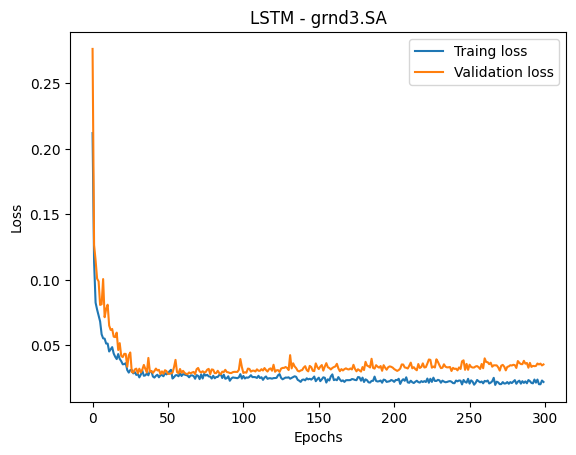

In [ ]:
plt.plot(validation.history['loss'], label='Traing loss')
plt.plot(validation.history['val_loss'], label='Validation loss')
plt.title('LSTM - grnd3.SA')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Fazer previsões usando o modelo
prev = model.predict(X_test)
prev = scaler.inverse_transform(prev)
prev

14/14 [==============================] - 0s 3ms/step


array([[ 8.242376 ],
       [ 8.365495 ],
       [ 8.313255 ],
       [ 8.340376 ],
       [ 8.383996 ],
       [ 8.472334 ],
       [ 8.768977 ],
       [ 8.727908 ],
       [ 8.995581 ],
       [ 8.964238 ],
       [ 8.902351 ],
       [ 7.915455 ],
       [ 7.71752  ],
       [ 7.9900255],
       [ 7.93685  ],
       [ 7.74915  ],
       [ 8.042455 ],
       [ 8.388258 ],
       [ 8.5063305],
       [ 8.804102 ],
       [ 9.194702 ],
       [ 9.091301 ],
       [ 9.085929 ],
       [ 9.193557 ],
       [ 8.798416 ],
       [ 9.099579 ],
       [ 9.736636 ],
       [ 9.388281 ],
       [ 9.387653 ],
       [ 9.186271 ],
       [ 9.357647 ],
       [ 9.29395  ],
       [ 9.297403 ],
       [ 9.1944   ],
       [ 9.189692 ],
       [ 9.441232 ],
       [ 9.775587 ],
       [10.057187 ],
       [10.168084 ],
       [10.130587 ],
       [10.194019 ],
       [ 9.758609 ],
       [10.182133 ],
       [ 9.925257 ],
       [ 9.931941 ],
       [ 9.71605  ],
       [ 9.772043 ],
       [ 9.68

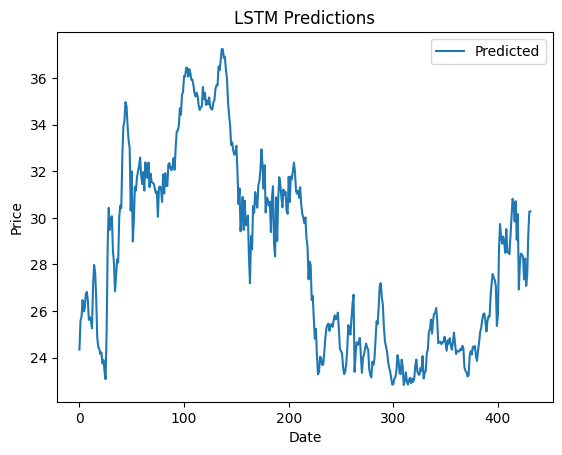

In [ ]:
# Plot dos valores previstos
plt.plot(prev, label='Predicted')
plt.title('LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

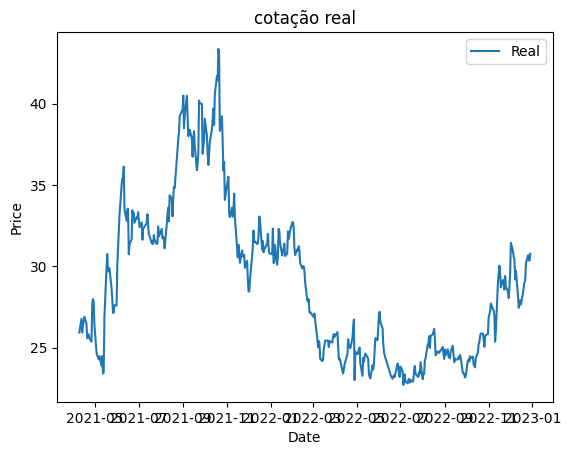

In [ ]:
dados_grnd_final = dados_grnd['Close'][-432:]

# Plot dos valores reais
plt.plot(dados_grnd_final, label= 'Real')
plt.title('cotação real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

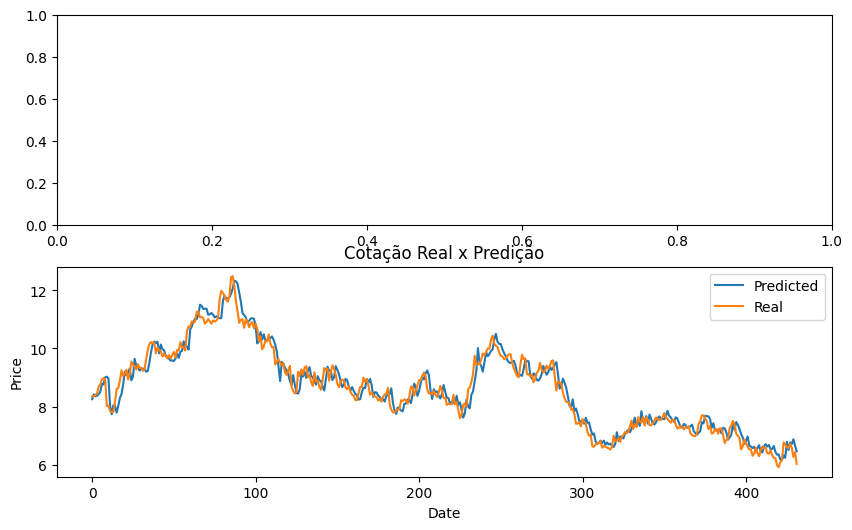

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot dos valores previstos
plt.plot(prev, label='Predicted')
plt.legend()

# Plot dos valores reais
plt.plot(dados_grnd_final, label='Real')
plt.title('Cotação Real x Predição')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()